In [3]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load data
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Train and test data
train = data.drop(['formation_energy_ev_natom', 'bandgap_energy_ev', 'id'], axis=1)
id_col = test['id']
test = test.drop(['id'], axis=1)
columns = train.columns

train.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893


## Data Exploration

In [4]:
# Summary of the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
id                            2400 non-null int64
spacegroup                    2400 non-null int64
number_of_total_atoms         2400 non-null float64
percent_atom_al               2400 non-null float64
percent_atom_ga               2400 non-null float64
percent_atom_in               2400 non-null float64
lattice_vector_1_ang          2400 non-null float64
lattice_vector_2_ang          2400 non-null float64
lattice_vector_3_ang          2400 non-null float64
lattice_angle_alpha_degree    2400 non-null float64
lattice_angle_beta_degree     2400 non-null float64
lattice_angle_gamma_degree    2400 non-null float64
formation_energy_ev_natom     2400 non-null float64
bandgap_energy_ev             2400 non-null float64
dtypes: float64(12), int64(2)
memory usage: 262.6 KB


In [5]:
# Descriptive statistics.
data.describe()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,141.517917,61.679167,0.385439,0.308601,0.305958,10.030005,7.086977,12.593288,90.243666,92.398971,94.787600,0.187614,2.077205
std,692.964646,84.715548,22.598337,0.265566,0.233717,0.263198,5.645457,1.890330,5.450746,1.333655,5.299734,25.868516,0.104100,1.006845
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.727400,0.000000,0.000100
25%,600.750000,33.000000,40.000000,0.166700,0.093800,0.062500,6.141100,5.833625,9.298000,89.999700,90.000900,89.998700,0.105600,1.278500
50%,1200.500000,194.000000,80.000000,0.375000,0.281200,0.250000,9.537450,6.382950,10.125000,90.001700,90.003550,90.000400,0.181800,1.907850
75%,1800.250000,206.000000,80.000000,0.583300,0.468800,0.468800,10.292100,9.093450,14.372050,90.006200,90.014400,119.998325,0.256275,2.761950
max,2400.000000,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.053500,0.657200,5.286100


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

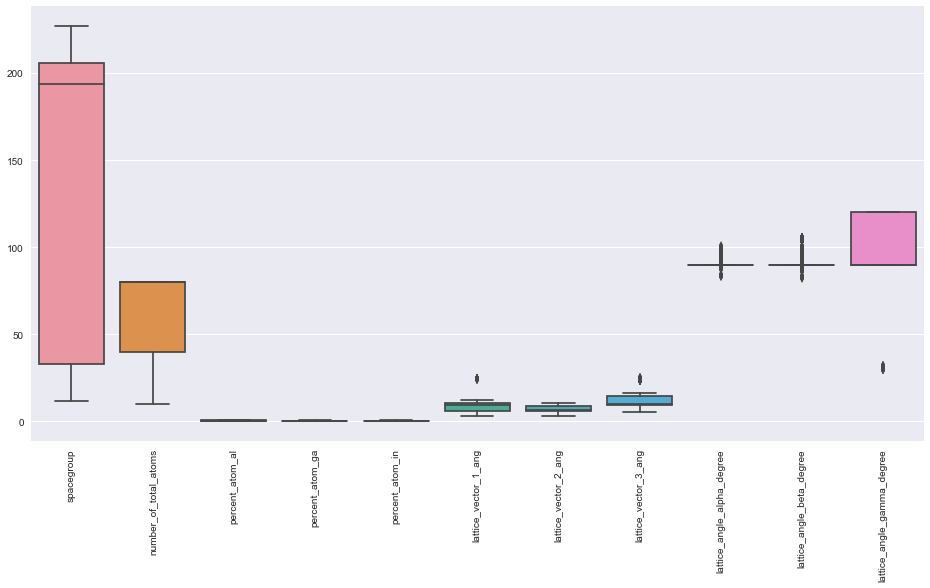

In [6]:
# Boxplots

plt.figure( figsize=(16, 8))
sns.boxplot(train)
plt.xticks(rotation=90)

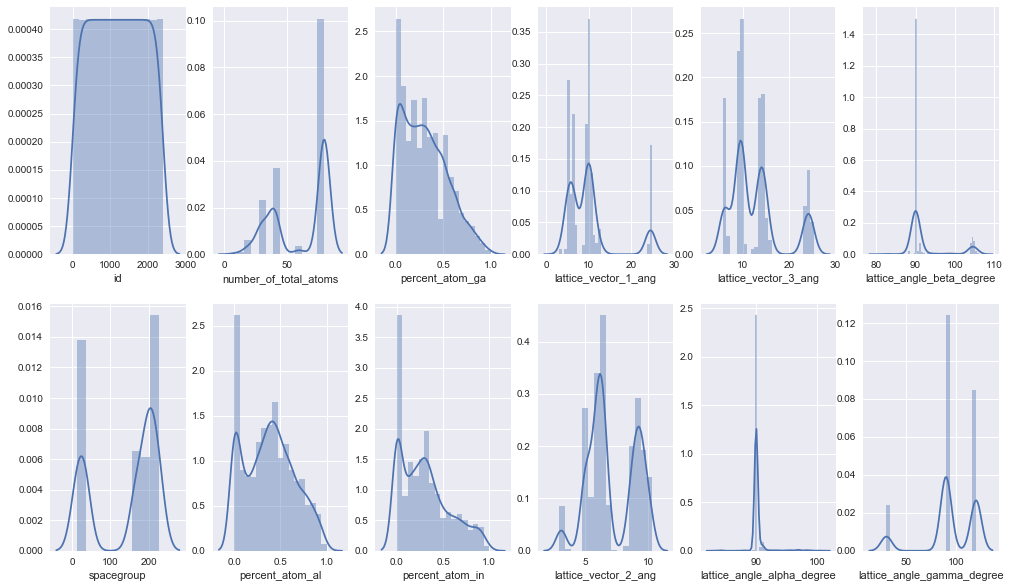

In [10]:
# Distributions

fig, axes = plt.subplots(2, 6, figsize=(17, 10))

sns.distplot(data.iloc[:,0], ax=axes[0,0])
sns.distplot(data.iloc[:,1], ax=axes[1,0])
sns.distplot(data.iloc[:,2], ax=axes[0,1])
sns.distplot(data.iloc[:,3], ax=axes[1,1])
sns.distplot(data.iloc[:,4], ax=axes[0,2])
sns.distplot(data.iloc[:,5], ax=axes[1,2])
sns.distplot(data.iloc[:,6], ax=axes[0,3])
sns.distplot(data.iloc[:,7], ax=axes[1,3])
sns.distplot(data.iloc[:,8], ax=axes[0,4])
sns.distplot(data.iloc[:,9], ax=axes[1,4])
sns.distplot(data.iloc[:,10], ax=axes[0,5])
sns.distplot(data.iloc[:,11], ax=axes[1,5])
# sns.distplot(data.iloc[:,12], ax=axes[0,6])
# sns.distplot(data.iloc[:,13], ax=axes[1,6])

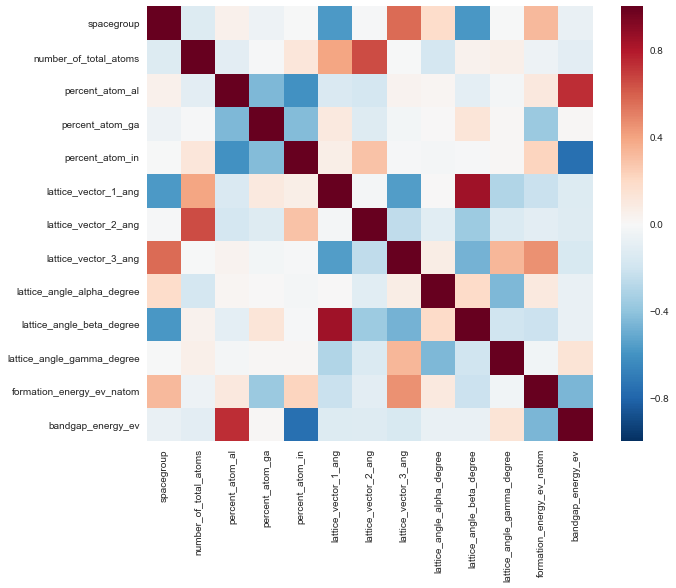

In [8]:
# Correlation heatmap.
plt.figure(figsize=(10, 8))
corr = data.iloc[:,1:].corr()
sns.heatmap(corr)

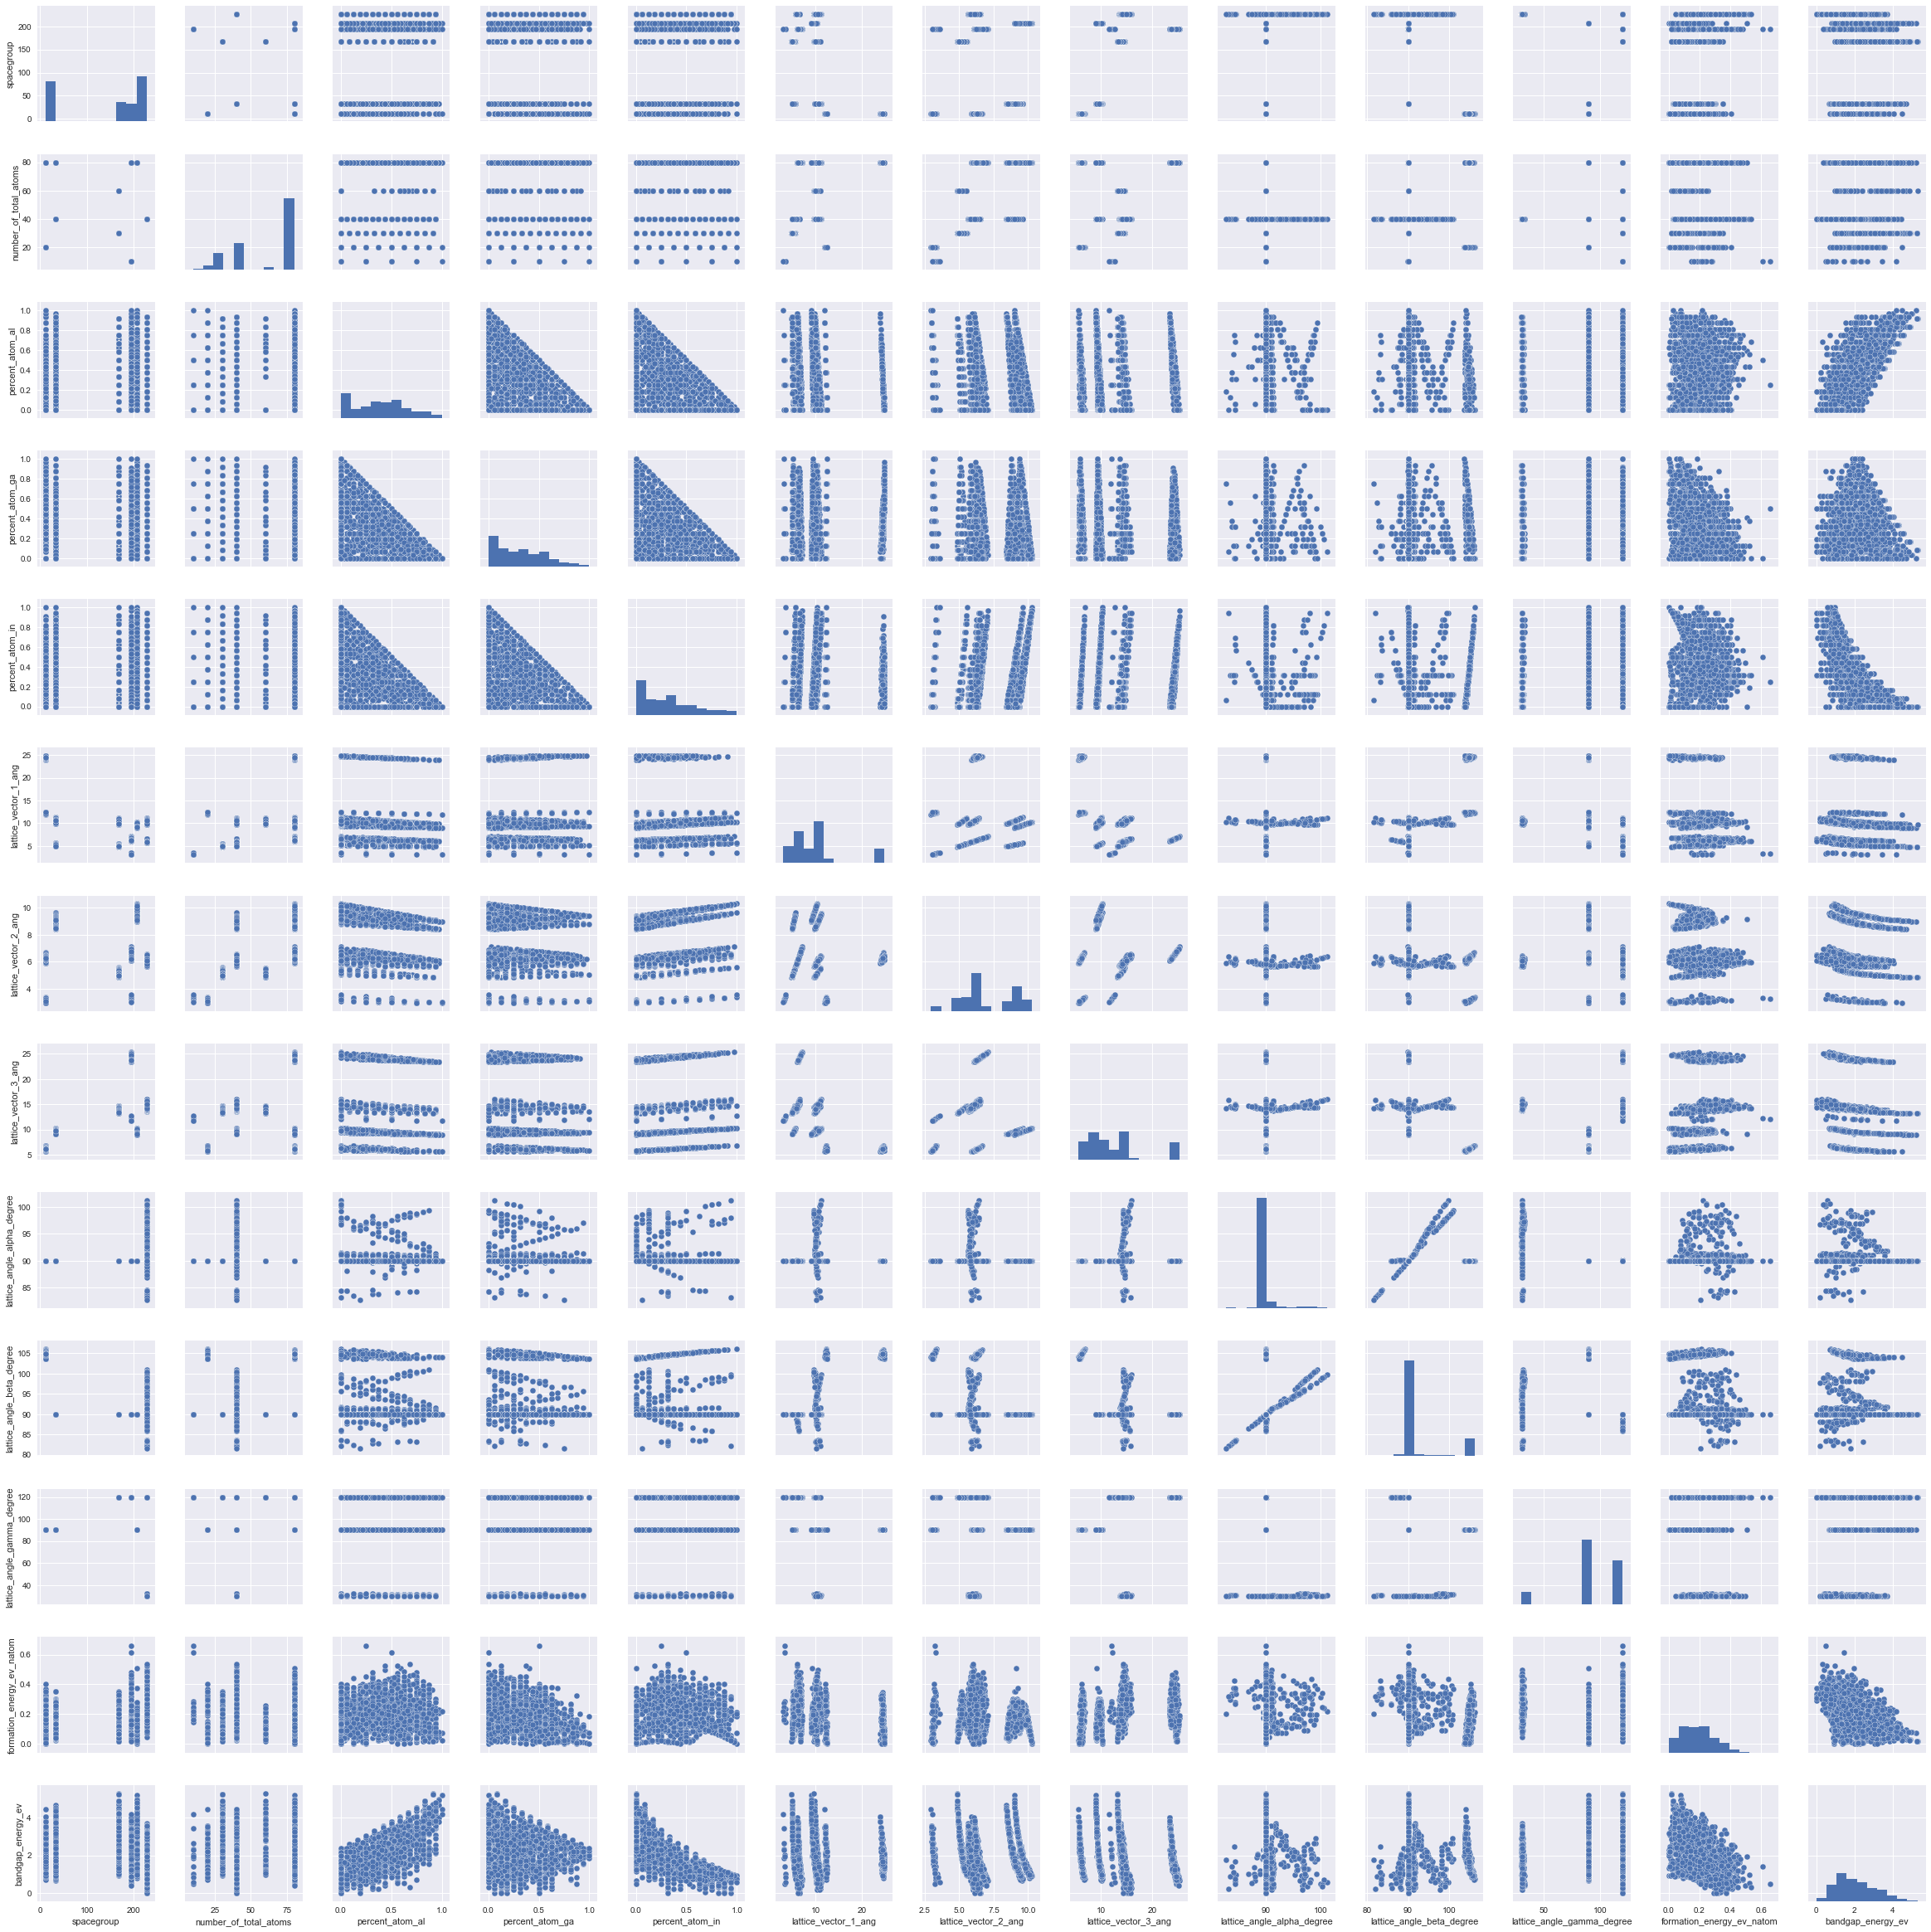

In [9]:
# Pairwise relationship plots
sns.pairplot(data.iloc[:,1:])

In [4]:
# Target variables

be = np.log1p(data['bandgap_energy_ev'])
fe = np.log1p(data['formation_energy_ev_natom'])

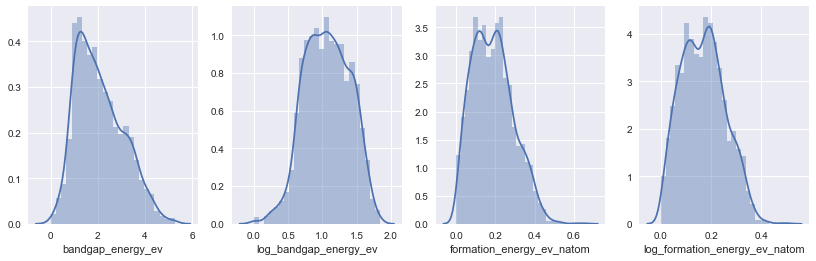

In [5]:
# Target variable and log transformed target variable distributions

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))

sns.distplot(data['bandgap_energy_ev'], ax=ax1)
sns.distplot(be, ax=ax2)
sns.distplot(data['formation_energy_ev_natom'], ax=ax3)
sns.distplot(fe, ax=ax4)

ax2.set_xlabel('log_bandgap_energy_ev')
ax4.set_xlabel('log_formation_energy_ev_natom')

## Feature Engineering

In [6]:
# Creating new features from existing ones.

def new_features(df):
    df['percent_atom_al_ga'] = df['percent_atom_al'] * df['percent_atom_ga']
    df['percent_atom_al_in'] = df['percent_atom_al'] * df['percent_atom_in']
    df['percent_atom_ga_in'] = df['percent_atom_ga'] * df['percent_atom_in']
    
    df['lattice_vector_1_ang_/_2'] = df['lattice_vector_1_ang'] / df['lattice_vector_2_ang']
    df['lattice_vector_2_ang_/_3'] = df['lattice_vector_2_ang'] / df['lattice_vector_3_ang']
    df['lattice_vector_3_ang_/_1'] = df['lattice_vector_3_ang'] / df['lattice_vector_1_ang']
    
    df['lattice_angle_alpha_beta_degree'] = df['lattice_angle_alpha_degree'] * df['lattice_angle_beta_degree']
    df['lattice_angle_beta_gamma_degree'] = df['lattice_angle_beta_degree'] * df['lattice_angle_gamma_degree']
    df['lattice_angle_gamma_alpha_degree'] = df['lattice_angle_gamma_degree'] * df['lattice_angle_alpha_degree']
    
    df['percent_atom_al_ga_in/lv1'] = (df['percent_atom_al'] + df['percent_atom_ga'] + df['percent_atom_in']) / df['lattice_vector_1_ang']
    df['percent_atom_al_ga_in/lv2'] = (df['percent_atom_al'] + df['percent_atom_ga'] + df['percent_atom_in']) / df['lattice_vector_2_ang']
    df['percent_atom_al_ga_in/lv3'] = (df['percent_atom_al'] + df['percent_atom_ga'] + df['percent_atom_in']) / df['lattice_vector_3_ang']
    
    df['percent_atom_al_ga_in*alpha'] = (df['percent_atom_al'] + df['percent_atom_ga'] + df['percent_atom_in']) * df['lattice_angle_alpha_degree']
    df['percent_atom_al_ga_in*beta'] = (df['percent_atom_al'] + df['percent_atom_ga'] + df['percent_atom_in']) * df['lattice_angle_beta_degree']
    df['percent_atom_al_ga_in*gamma'] = (df['percent_atom_al'] + df['percent_atom_ga'] + df['percent_atom_in']) * df['lattice_angle_gamma_degree']
    
    df['lattice_vector_A_B_G_1'] = np.sqrt(df['lattice_angle_alpha_degree'] * df['lattice_angle_beta_degree'] * df['lattice_angle_gamma_degree']) / df['lattice_vector_1_ang']
    df['lattice_vector_A_B_G_2'] = np.sqrt(df['lattice_angle_alpha_degree'] * df['lattice_angle_beta_degree'] * df['lattice_angle_gamma_degree']) / df['lattice_vector_2_ang']
    df['lattice_vector_A_B_G_3'] = np.sqrt(df['lattice_angle_alpha_degree'] * df['lattice_angle_beta_degree'] * df['lattice_angle_gamma_degree']) / df['lattice_vector_3_ang']
    
    df['lattice_123_A_B'] = (df['lattice_vector_1_ang'] + df['lattice_vector_2_ang'] + df['lattice_vector_3_ang']) / (df['lattice_angle_alpha_degree'] * df['lattice_angle_beta_degree'])
    df['lattice_123_B_G'] = (df['lattice_vector_1_ang'] + df['lattice_vector_2_ang'] + df['lattice_vector_3_ang']) / (df['lattice_angle_beta_degree'] * df['lattice_angle_gamma_degree'])
    df['lattice_123_G_A'] = (df['lattice_vector_1_ang'] + df['lattice_vector_2_ang'] + df['lattice_vector_3_ang']) / (df['lattice_angle_gamma_degree'] * df['lattice_angle_alpha_degree'])
    
    df['NTA_al_ga_in'] = df['number_of_total_atoms'] * (df['percent_atom_al'] + df['percent_atom_ga'] + df['percent_atom_in'])
    df['NTA_1_2_3'] = df['number_of_total_atoms'] * (df['lattice_vector_1_ang'] + df['lattice_vector_2_ang'] + df['lattice_vector_3_ang'])
    df['NTA_A_B_G'] = df['number_of_total_atoms'] * (df['lattice_angle_alpha_degree'] + df['lattice_angle_beta_degree'] + df['lattice_angle_gamma_degree'])
    
    return(df)

In [8]:
new_train = new_features(train)
columns = new_train.columns
new_train.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,percent_atom_al_ga_in*gamma,lattice_vector_A_B_G_1,lattice_vector_A_B_G_2,lattice_vector_A_B_G_3,lattice_123_A_B,lattice_123_B_G,lattice_123_G_A,NTA_al_ga_in,NTA_1_2_3,NTA_A_B_G
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,...,90.0017,85.793864,99.849880,93.036914,0.003417,0.003417,0.003417,80.0,2214.488,21600.528
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,...,120.0025,159.444015,159.449172,41.728990,0.004443,0.003333,0.003332,80.0,2879.720,24001.528
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,...,30.5185,51.581290,88.871659,36.021568,0.003544,0.010562,0.010580,40.0,1174.940,8504.404
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,...,120.0017,197.040413,197.048290,72.858852,0.002906,0.002179,0.002180,30.0,706.164,9000.072
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,...,119.9893,147.992618,147.997061,40.105203,0.004680,0.003510,0.003510,80.0,3032.312,23998.872


In [9]:
#Scale all data between 0-1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(new_train[::]), columns=columns)
train.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,percent_atom_al_ga_in*gamma,lattice_vector_A_B_G_1,lattice_vector_A_B_G_2,lattice_vector_A_B_G_3,lattice_123_A_B,lattice_123_B_G,lattice_123_G_A,NTA_al_ga_in,NTA_1_2_3,NTA_A_B_G
0,0.097674,1.000000,0.6250,0.3750,0.000,0.316108,0.763337,0.178158,0.392655,0.340891,...,0.667297,0.170217,0.114005,0.483085,0.455697,0.151125,0.153388,0.999886,0.682187,0.885654
1,0.846512,1.000000,0.6250,0.3750,0.000,0.143854,0.441140,0.912710,0.393520,0.340716,...,0.999435,0.426076,0.348878,0.097471,0.836930,0.143948,0.146039,0.999886,0.904970,0.999976
2,1.000000,0.428571,0.8125,0.1875,0.000,0.306906,0.369788,0.421404,0.444922,0.386576,...,0.008758,0.051363,0.070741,0.054576,0.502627,0.759775,0.772688,0.428522,0.334047,0.262096
3,0.720930,0.285714,0.7500,0.0000,0.250,0.089896,0.280498,0.399487,0.391908,0.341282,...,0.999427,0.556685,0.497052,0.331433,0.265729,0.045663,0.046397,0.285682,0.177056,0.285696
4,0.846512,1.000000,0.0000,0.6250,0.375,0.165676,0.506111,0.961130,0.392298,0.340822,...,0.999289,0.386294,0.303747,0.085267,0.924803,0.159017,0.161414,0.999886,0.956072,0.999849


In [10]:
#Function for calculating RMSLE

def rmsle(a, p):
    return np.sqrt(np.square(np.log(p + 1) - np.log(a + 1)).mean())

#Create scoring parameter to evaluate models
rmsle_score = make_scorer(rmsle, greater_is_better=True)

In [11]:
# Function for PCA

from sklearn.decomposition import PCA

def PCA_scores(train, model, cv):
    be_score = []
    fe_score = []

    for i in np.arange(1,len(columns)):
        pca = PCA(n_components=i, random_state=9)
        pca_train = pca.fit_transform(train)
        pca_train = pd.DataFrame(pca_train)

        be_score.append(np.mean(cross_val_score(model, pca_train, be, cv=cv, scoring=rmsle_score)))
        fe_score.append(np.mean(cross_val_score(model, pca_train, fe, cv=cv, scoring=rmsle_score)))    
    
    return be_score, fe_score

## SVM

In [16]:
from sklearn.svm import SVR

svr = SVR(kernel='poly',
         C=1,
         gamma=1)

svm_be = cross_val_score(svr, train, be, cv=10, scoring=rmsle_score)
svm_fe = cross_val_score(svr, train, fe, cv=10, scoring=rmsle_score)


print(np.mean(svm_be))
print(np.mean(svm_fe))

0.054402722774397026
0.049805269000957456


In [17]:
# SVM with PCA

svm_be_score, svm_fe_score = PCA_scores(train, svr, 3)

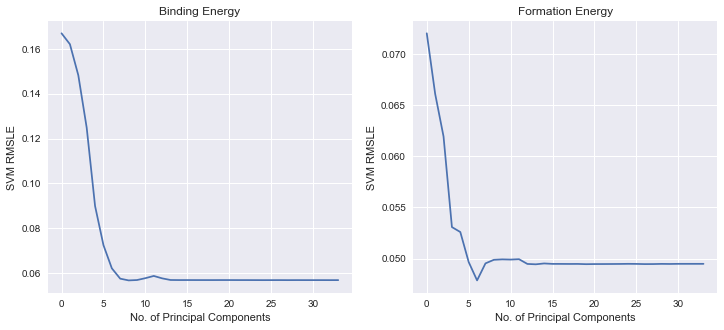

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(svm_be_score)
ax2.plot(svm_fe_score)

ax1.set_xlabel('No. of Principal Components')
ax1.set_ylabel('SVM RMSLE')
ax1.set_title('Binding Energy')

ax2.set_xlabel('No. of Principal Components')
ax2.set_ylabel('SVM RMSLE')
ax2.set_title('Formation Energy')

In [20]:
svm_pca = PCA(n_components=9, random_state=9)
svm_pca_train = svm_pca.fit_transform(train)
svm_pca_train = pd.DataFrame(svm_pca_train)

svm_pca_be = cross_val_score(svr, svm_pca_train, be, cv=10, scoring=rmsle_score)
svm_pca_fe = cross_val_score(svr, svm_pca_train, fe, cv=10, scoring=rmsle_score)

print('BE SVM: ', np.mean(svm_pca_be))
print('FE SVM: ', np.mean(svm_pca_fe))

BE SVM:  0.0541068733687848
FE SVM:  0.04792765398267055


## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.00001,
              random_state=9)

ridge_be = cross_val_score(ridge, train, be, cv=10, scoring=rmsle_score)
ridge_fe = cross_val_score(ridge, train, fe, cv=10, scoring=rmsle_score)

print('BE Ridge: ', np.mean(ridge_be))
print('FE Ridge: ', np.mean(ridge_fe))

BE Ridge:  0.05381553326329317
FE Ridge:  0.032963176808996145


In [22]:
# Ridge with PCA

ridge_be_score, ridge_fe_score = PCA_scores(train, ridge, 3)

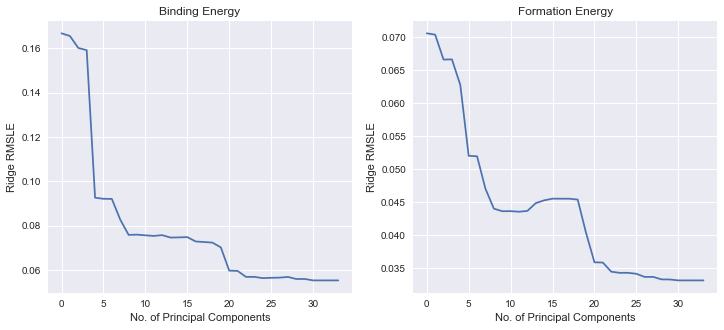

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(ridge_be_score)
ax2.plot(ridge_fe_score)

ax1.set_xlabel('No. of Principal Components')
ax1.set_ylabel('Ridge RMSLE')
ax1.set_title('Binding Energy')

ax2.set_xlabel('No. of Principal Components')
ax2.set_ylabel('Ridge RMSLE')
ax2.set_title('Formation Energy')

In [24]:
ridge_pca = PCA(n_components=20, random_state=9)
ridge_pca_train = ridge_pca.fit_transform(train)
ridge_pca_train = pd.DataFrame(ridge_pca_train)

ridge_pca_be = cross_val_score(ridge, ridge_pca_train, be, cv=10, scoring=rmsle_score)
ridge_pca_fe = cross_val_score(ridge, ridge_pca_train, fe, cv=10, scoring=rmsle_score)

print('BE Ridge: ', np.mean(ridge_pca_be))
print('FE Ridge: ', np.mean(ridge_pca_fe))

BE Ridge:  0.06797495615035573
FE Ridge:  0.03890201562546365


## XGBoost and Gridsearch

In [10]:
from sklearn.grid_search import GridSearchCV

learning_rate_range = [0.01, 0.05, 0.1]
max_depth_range = [3, 4, 5, 6, 7]
min_child_weight_range = [6, 7, 8]
subsample_range = [0.6, 0.7, 0.8, 0.9]
colsample_range = [0.7, 0.8, 0.9]

xgb_param_grid = dict(learning_rate=learning_rate_range,
                         max_depth=max_depth_range,
                        min_child_weight=min_child_weight_range,
                        subsample=subsample_range,
                        colsample_bytree=colsample_range)

In [13]:
import xgboost as xgb

xgb_ = xgb.XGBRegressor(n_jobs=10,
              objective='reg:linear',
              eta=0.1,
              eval_metric='rmse',
              n_estimators=500,
              silent=1,
              seed=90,
              n_stopping_rounds=10)

In [144]:
print('Binding Energy Parameters: ', '\n', xgb_be_grid.best_params_)
print('\n')
print(xgb_be_grid.best_score_)

Binding Energy Parameters:  
 {'colsample_bytree': 0.7, 'eta': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 8, 'subsample': 0.6}


-0.05075877880178715


In [142]:
print(xgb_fe_grid.best_params_)
print('\n')
print(xgb_fe_grid.best_score_)

{'colsample_bytree': 0.9, 'eta': 0.01, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 8, 'subsample': 0.8}


-0.026330226367913077


In [14]:
# Predicting with XGB

#Binding Energy

xgb_be = xgb.XGBRegressor(n_jobs=10,
              objective='reg:linear',
                          colsample_bytree=0.7,
                          learning_rate=0.05,
                          max_depth=3,
                          min_child_weight=8,
                          subsample=0.8,
                          eta=0.01,
                          eval_metric='rmse',
                          n_estimators=1000,
                          silent=1,
                          seed=90,
                          n_stopping_rounds=10)

#Formation Energy

xgb_fe = xgb.XGBRegressor(n_jobs=10,
              objective='reg:linear',
                          colsample_bytree=0.9,
                          learning_rate=0.01,
                          max_depth=6,
                          min_child_weight=8,
                          subsample=0.8,
                          eta=0.01,
                          eval_metric='rmse',
                          n_estimators=1000,
                          silent=1,
                          seed=90,
                          n_stopping_rounds=10)

In [15]:
be_preds = cross_val_score(xgb_be, train, be, cv=3, scoring=rmsle_score)
fe_preds = cross_val_score(xgb_fe, train, fe, cv=4, scoring=rmsle_score)

print('BE XGB: ', np.mean(be_preds))
print('FE XGB: ', np.mean(fe_preds))

BE XGB:  0.05337364714456305
FE XGB:  0.027536426036475534


In [16]:
# XGB with PCA

xgb_be_score, xgb_fe_score = PCA_scores(train, xgb_, 3)

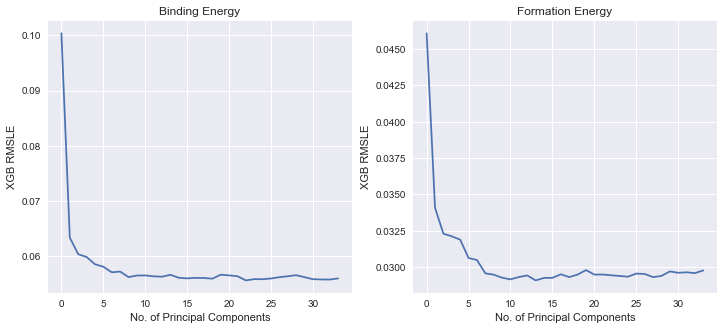

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(xgb_be_score)
ax2.plot(xgb_fe_score)

ax1.set_xlabel('No. of Principal Components')
ax1.set_ylabel('XGB RMSLE')
ax1.set_title('Binding Energy')

ax2.set_xlabel('No. of Principal Components')
ax2.set_ylabel('XGB RMSLE')
ax2.set_title('Formation Energy')

In [19]:
xgb_pca = PCA(n_components=9, random_state=9)
xgb_pca_train = xgb_pca.fit_transform(train)
xgb_pca_train = pd.DataFrame(xgb_pca_train)

xgb_pca_be = cross_val_score(xgb_be, xgb_pca_train, be, cv=5, scoring=rmsle_score)
xgb_pca_fe = cross_val_score(xgb_fe, xgb_pca_train, fe, cv=5, scoring=rmsle_score)

print('BE XGB: ', np.mean(xgb_pca_be))
print('FE XGB: ', np.mean(xgb_pca_fe))

BE XGB:  0.055323199213147246
FE XGB:  0.028613224365143096


In [20]:
#Fit and predict

be = xgb_be.fit(xgb_pca_train, be)
fe = xgb_fe.fit(xgb_pca_train, fe)

In [36]:
test = new_features(test)
columns = test.columns
test = pd.DataFrame(scaler.fit_transform(test[::]), columns=columns)

test.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,...,percent_atom_al_ga_in*gamma,lattice_vector_A_B_G_1,lattice_vector_A_B_G_2,lattice_vector_A_B_G_3,lattice_123_A_B,lattice_123_B_G,lattice_123_G_A,NTA_al_ga_in,NTA_1_2_3,NTA_A_B_G
0,0.097674,1.000000,0.1875,0.483898,0.354872,0.341796,0.830521,0.200840,0.363614,0.311966,...,0.667392,0.155702,0.072632,0.439102,0.523888,0.185496,0.188098,1.000000,0.724090,0.885634
1,0.097674,1.000000,0.7500,0.258051,0.000000,0.312296,0.760186,0.175019,0.363852,0.312053,...,0.667302,0.174289,0.096074,0.477173,0.446691,0.165900,0.168223,0.999886,0.679399,0.885660
2,0.720930,0.285714,0.6667,0.172069,0.172069,0.087357,0.277211,0.396877,0.363050,0.312423,...,0.999551,0.567292,0.495935,0.319354,0.257472,0.048797,0.049553,0.285724,0.176030,0.285689
3,0.000000,1.000000,0.5625,0.451590,0.000000,0.973608,0.418279,0.003259,0.363602,0.908496,...,0.667288,0.003137,0.310132,0.985503,0.621334,0.210248,0.270711,0.999886,0.910016,0.938418
4,0.000000,1.000000,0.1875,0.516102,0.322564,0.987679,0.456896,0.023501,0.363631,0.940127,...,0.667287,0.001945,0.284235,0.910156,0.650456,0.217647,0.282477,0.999886,0.936501,0.941219


In [40]:
pca_test = xgb_pca.transform(test)
pca_test = pd.DataFrame(pca_test)

xgb_be_prediction = np.expm1(be.predict(pca_test))
xgb_fe_prediction = np.expm1(fe.predict(pca_test))

#xgb_pca_train.head()

In [41]:
prediction = pd.DataFrame({'formation_energy_ev_natom': xgb_fe_prediction,
                           'bandgap_energy_ev': xgb_be_prediction,
                          'id': id_col,})

prediction = prediction[['id', 'formation_energy_ev_natom', 'bandgap_energy_ev']]

prediction.to_csv('DA_prediction.csv', index=False)

## Kaggle Score = 0.0607